<h1>Assignment 1 </h1>

<h2>
<font color='Orange'>The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.</font>
</h2>
<h3>The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
</h3>


# Attribute Information:

## Input variables:
### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [27]:
# Import essential packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
dataset = pd.read_csv("bank-additional.csv")
dataset.shape # print the Shape of the data set



(4119, 21)

<h1>DESCRIPTION OF DATA </h1>
<h2><font color = 'Orange '>General  Information and overview of data</h2>

In [29]:
dataset.info() #Get General information about the Dataset it columns and thier types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [30]:
dataset.tail() # Last five elemets of the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.400,93.918,-42.700,4.958,"5,228.100",no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.400,93.918,-42.700,4.959,"5,228.100",no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.800,92.893,-46.200,1.354,"5,099.100",no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.400,93.444,-36.100,4.966,"5,228.100",no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.100,93.200,-42.000,4.120,"5,195.800",no


In [31]:
dataset.head() # first five elemets of the dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.800,92.893,-46.200,1.313,"5,099.100",no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.100,93.994,-36.400,4.855,"5,191.000",no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.400,94.465,-41.800,4.962,"5,228.100",no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.400,94.465,-41.800,4.959,"5,228.100",no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.100,93.200,-42.000,4.191,"5,195.800",no


<h2><font color = 'Orange '>Items in each column and thier Frequency</h2>

In [32]:
x=[] # Storing all the columns and the apperance of  items  <frequency> inside each of the columns 
for (columnName, columnData) in dataset.iteritems():
    x.append( dataset[columnName].value_counts().to_frame())
    

In [33]:
from IPython.display import display

for i in x:
    display(i) #Display each column and the its items and thier frequency 

,age
32,216
31,191
30,177
34,174
35,172
...,...
82,2
86,2
88,1
19,1


,job
admin.,1012
blue-collar,884
technician,691
services,393
management,324
retired,166
self-employed,159
entrepreneur,148
unemployed,111
housemaid,110


,marital
married,2509
single,1153
divorced,446
unknown,11


,education
university.degree,1264
high.school,921
basic.9y,574
professional.course,535
basic.4y,429
basic.6y,228
unknown,167
illiterate,1


,default
no,3315
unknown,803
yes,1


,housing
yes,2175
no,1839
unknown,105


,loan
no,3349
yes,665
unknown,105


,contact
cellular,2652
telephone,1467


,month
may,1378
jul,711
aug,636
jun,530
nov,446
apr,215
oct,69
sep,64
mar,48
dec,22


,day_of_week
thu,860
mon,855
tue,841
wed,795
fri,768


,duration
77,24
112,23
73,22
81,21
90,20
...,...
486,1
490,1
494,1
502,1


,campaign
1,1764
2,1039
3,549
4,291
5,142
6,99
7,60
8,36
9,32
10,20


,pdays
999,3959
3,52
6,42
4,14
7,10
10,8
12,5
5,4
2,4
9,3


,previous
0,3523
1,475
2,78
3,25
4,14
6,2
5,2


,poutcome
nonexistent,3523
failure,454
success,142


,emp.var.rate
1.400,1626
-1.800,883
1.100,758
-0.100,392
-2.900,164
-3.400,104
-1.700,87
-1.100,83
-3.000,21
-0.200,1


,cons.price.idx
93.994,758
93.918,667
92.893,597
93.444,528
94.465,431
93.200,386
93.075,201
92.201,75
92.963,75
92.431,43


,cons.conf.idx
-36.400,758
-42.700,667
-46.200,597
-36.100,528
-41.800,431
-42.000,386
-47.100,201
-31.400,75
-40.800,75
-26.900,43


,euribor3m
4.857,274
4.963,256
4.962,237
4.961,212
4.856,138
...,...
1.046,1
0.710,1
0.650,1
1.778,1


,nr.employed
"5,228.100",1626
"5,099.100",823
"5,191.000",758
"5,195.800",392
"5,076.200",164
"5,017.500",104
"4,991.600",87
"4,963.600",83
"5,008.700",60
"5,023.500",21


,y
no,3668
yes,451


<h3><font color = 'Violet '>Visualizing Items in each column & Frequency</h3>

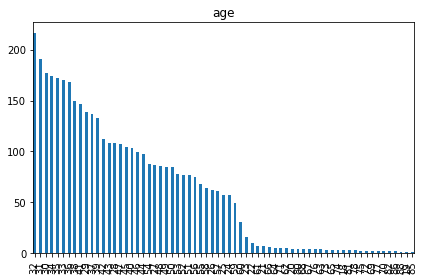

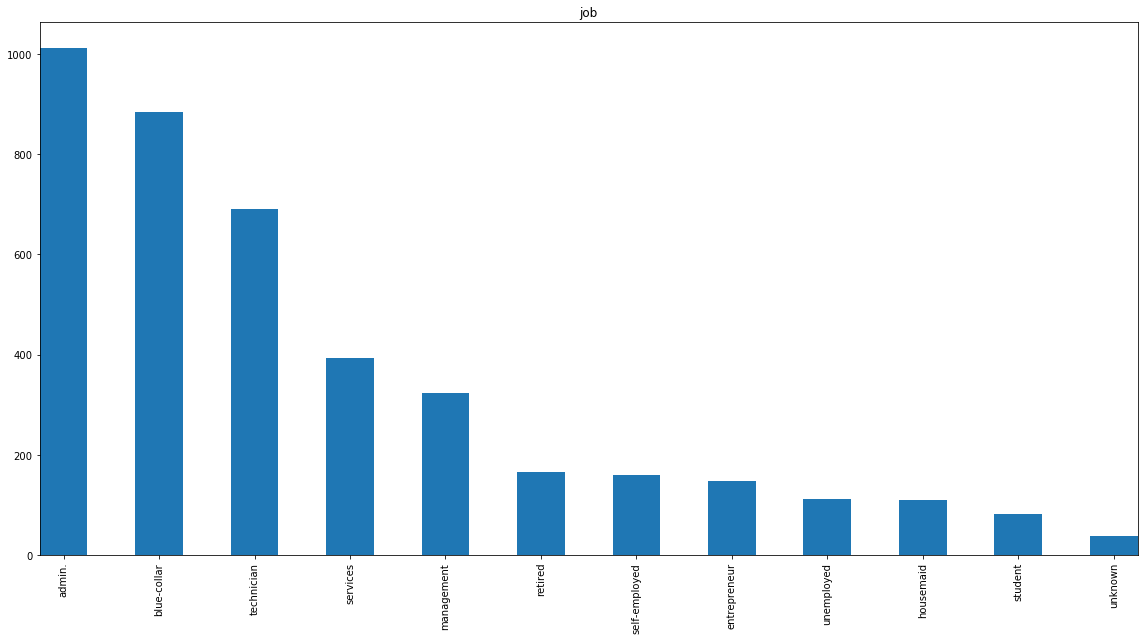

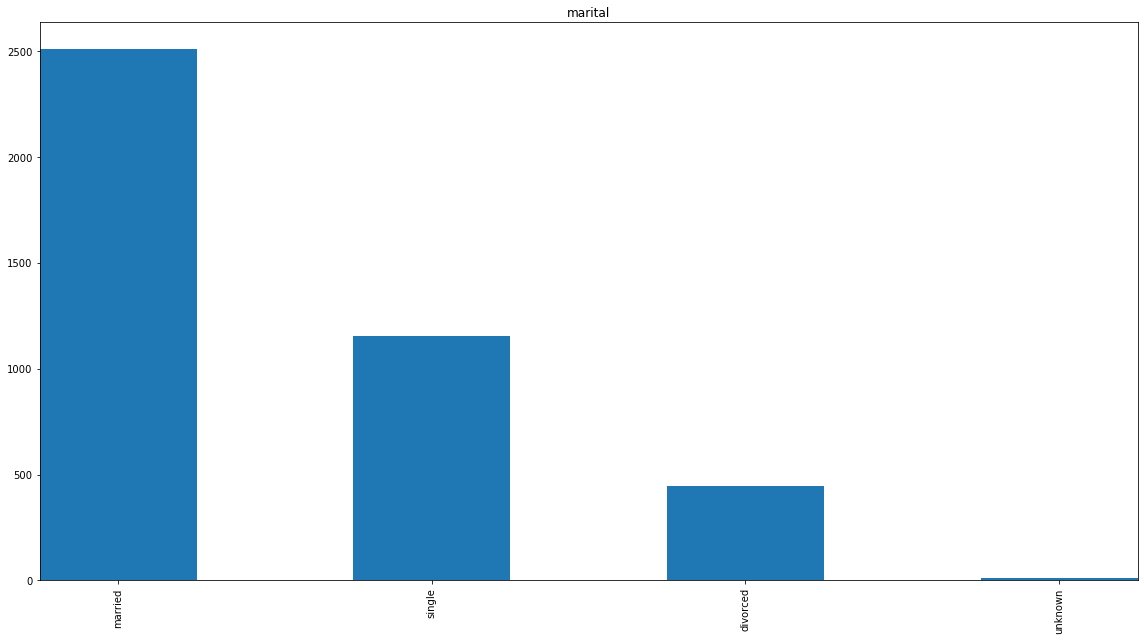

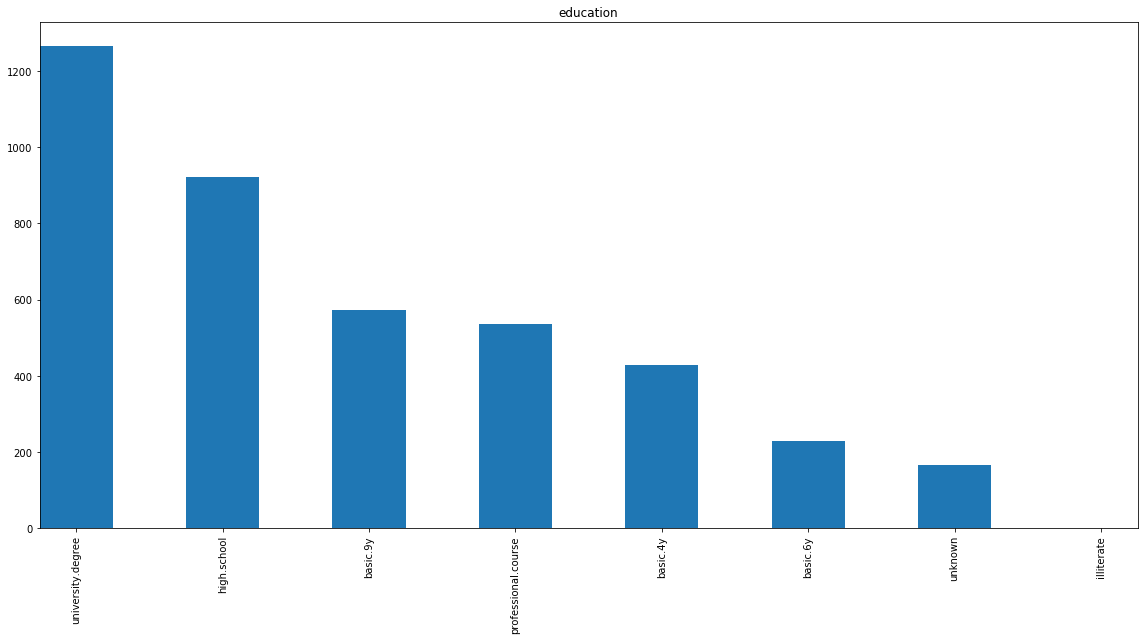

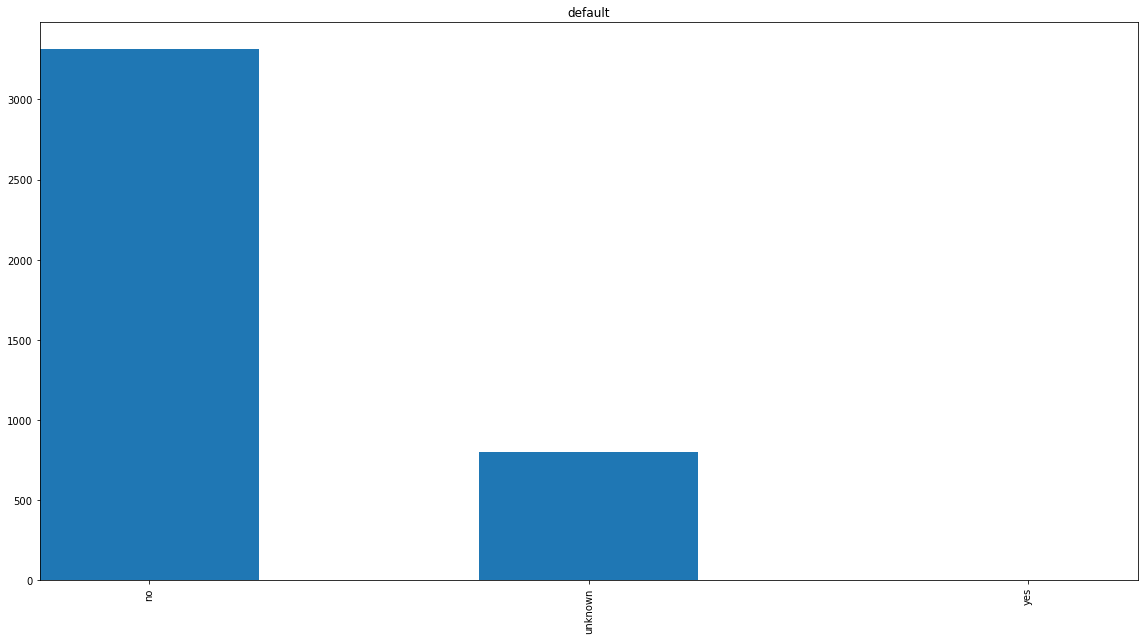

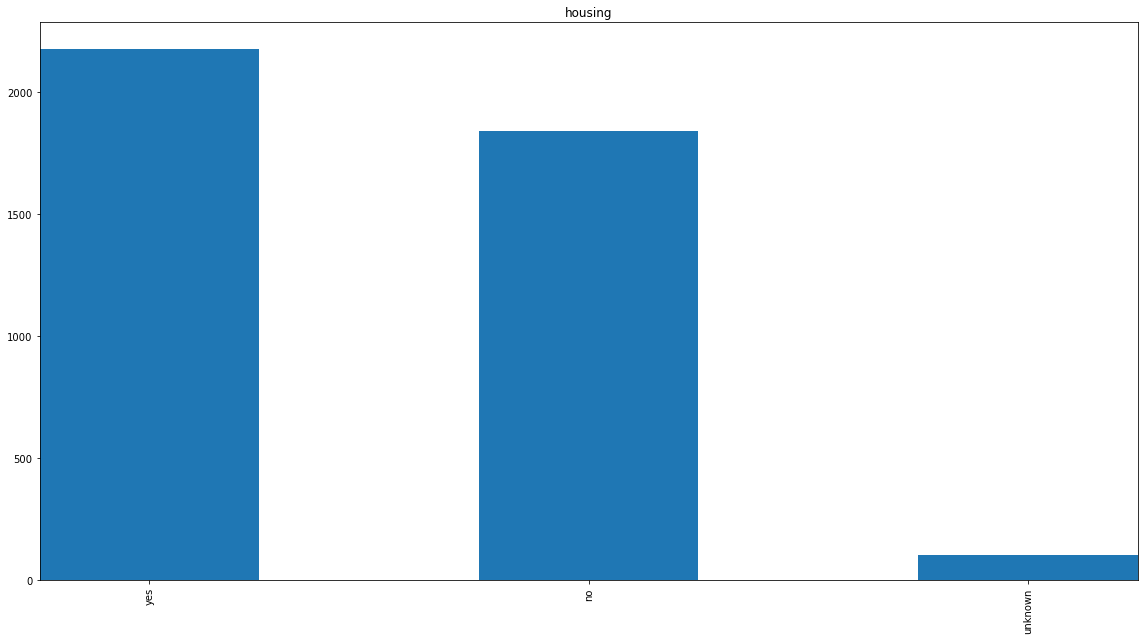

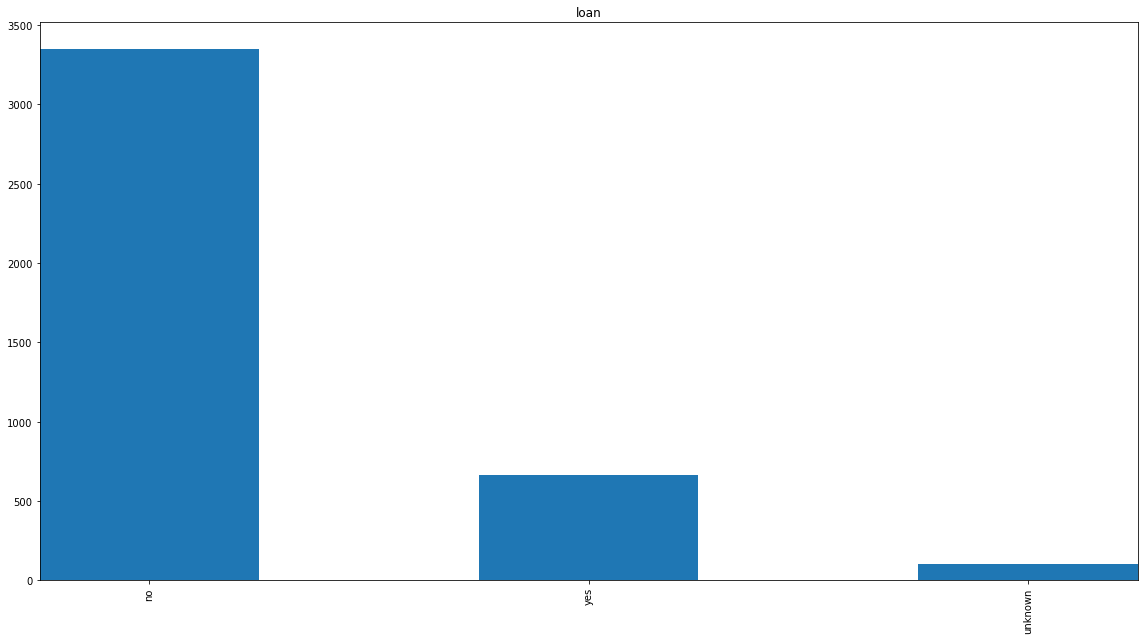

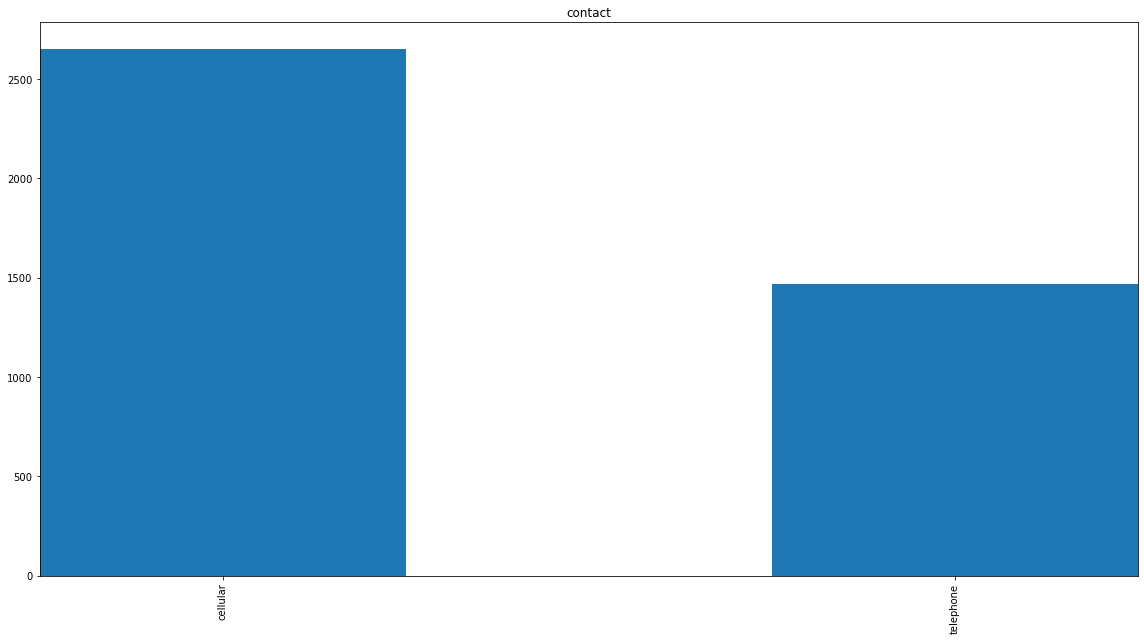

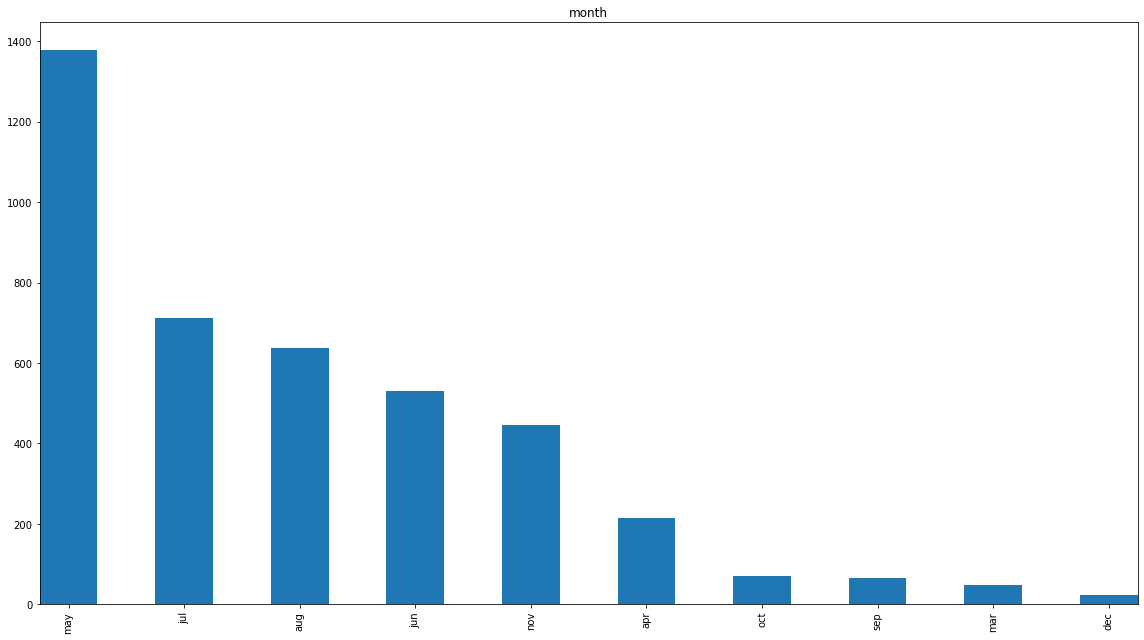

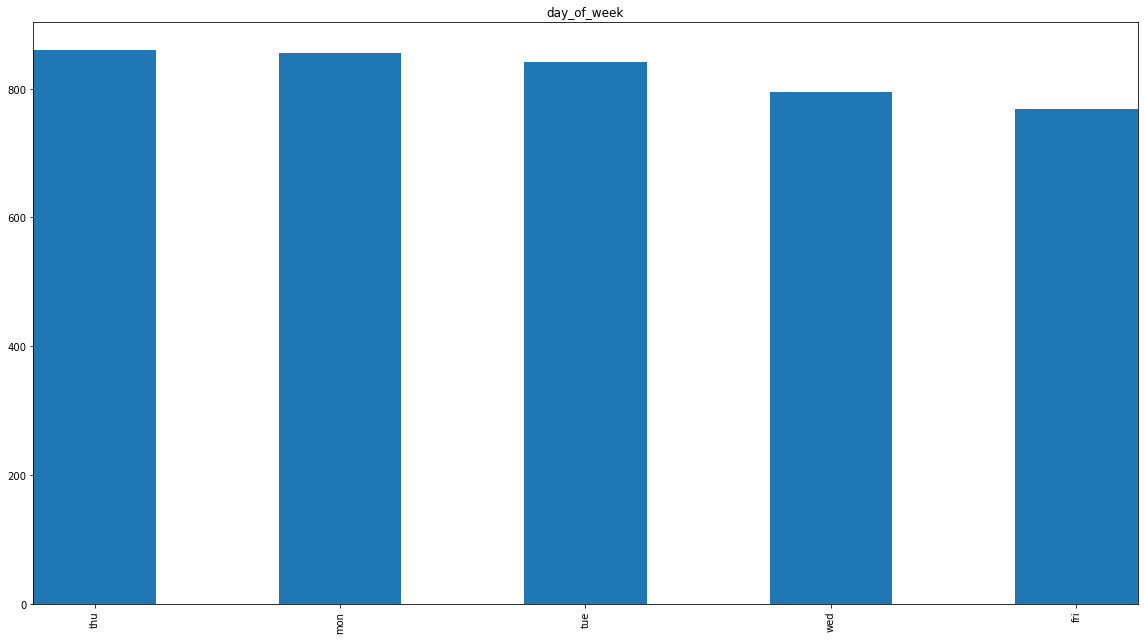

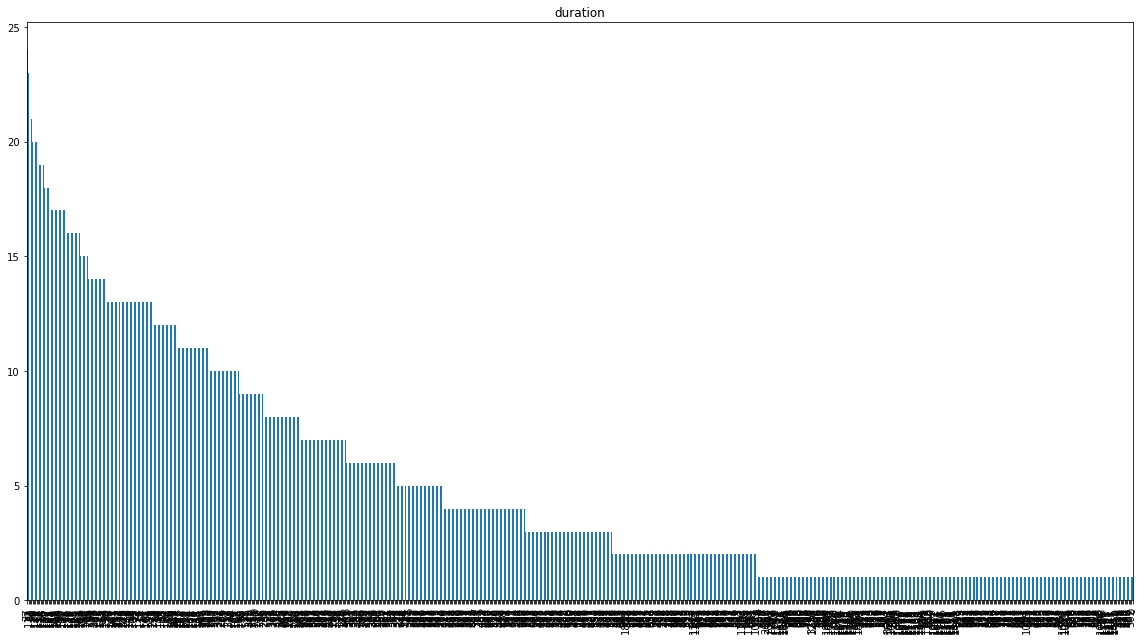

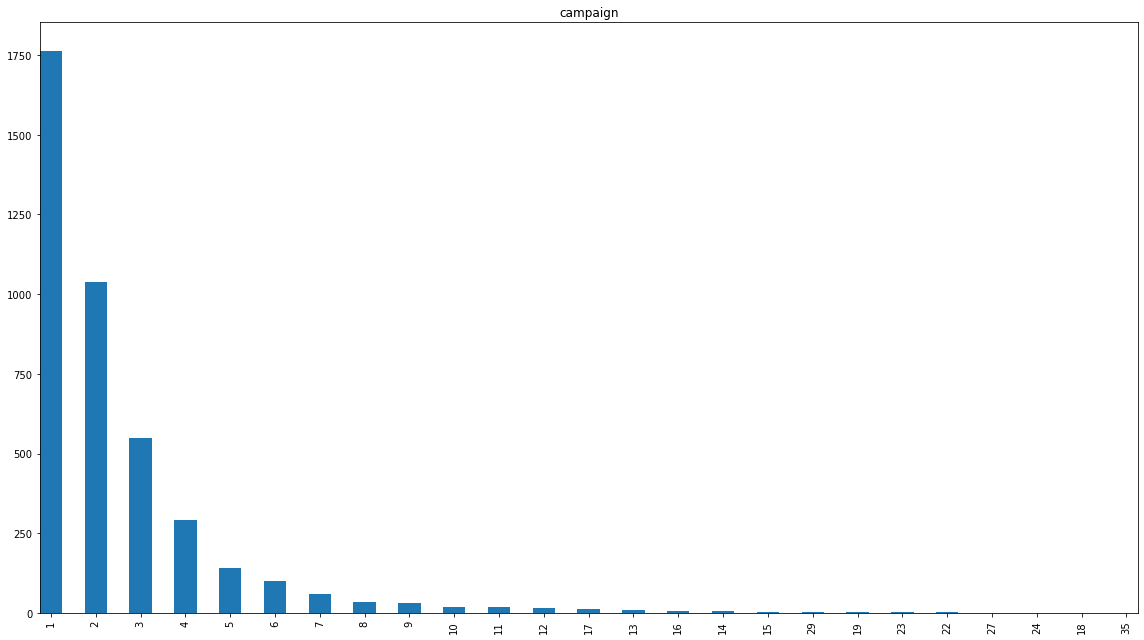

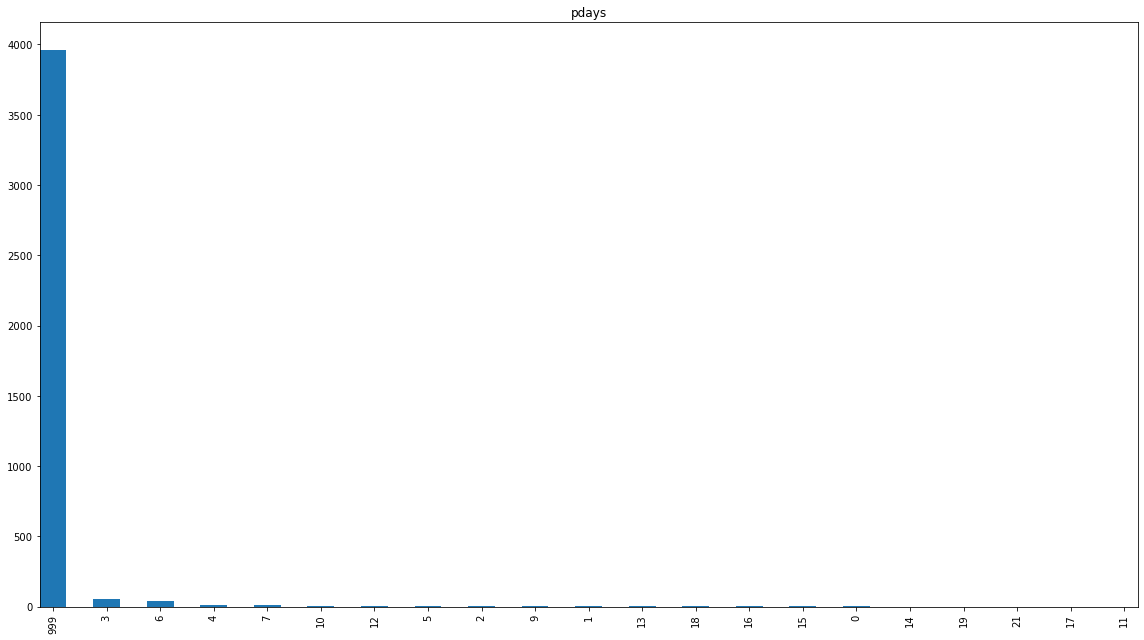

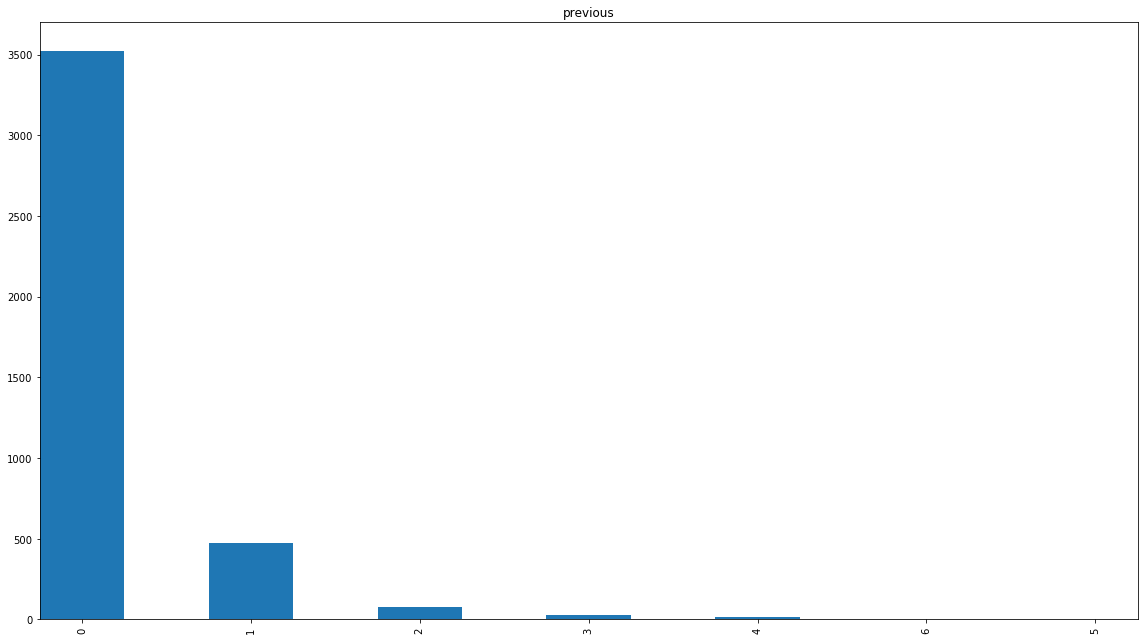

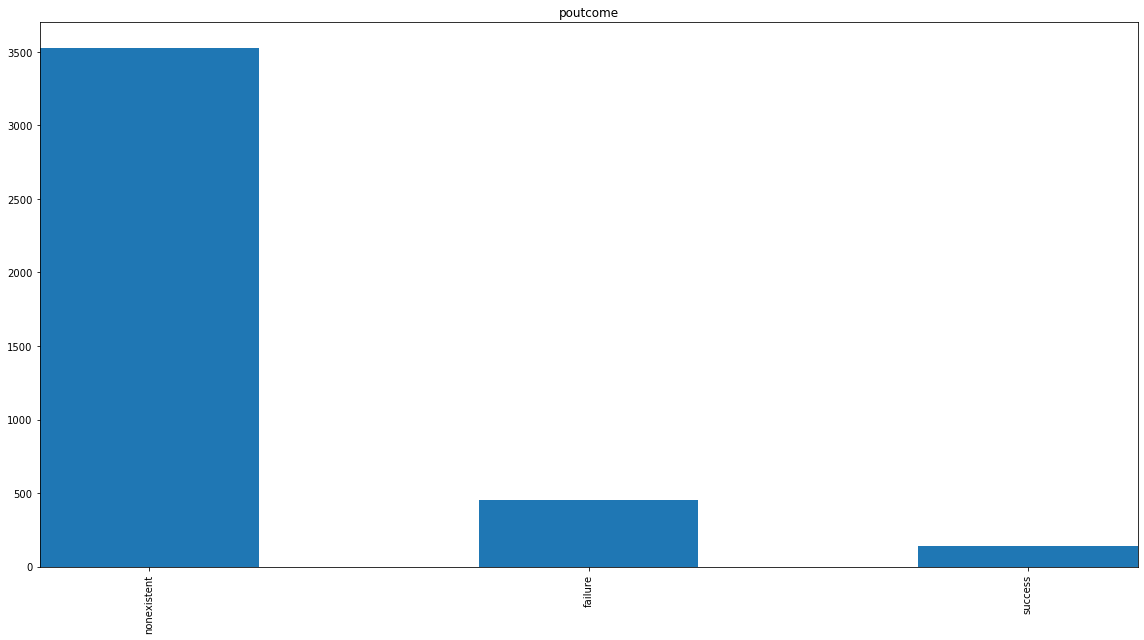

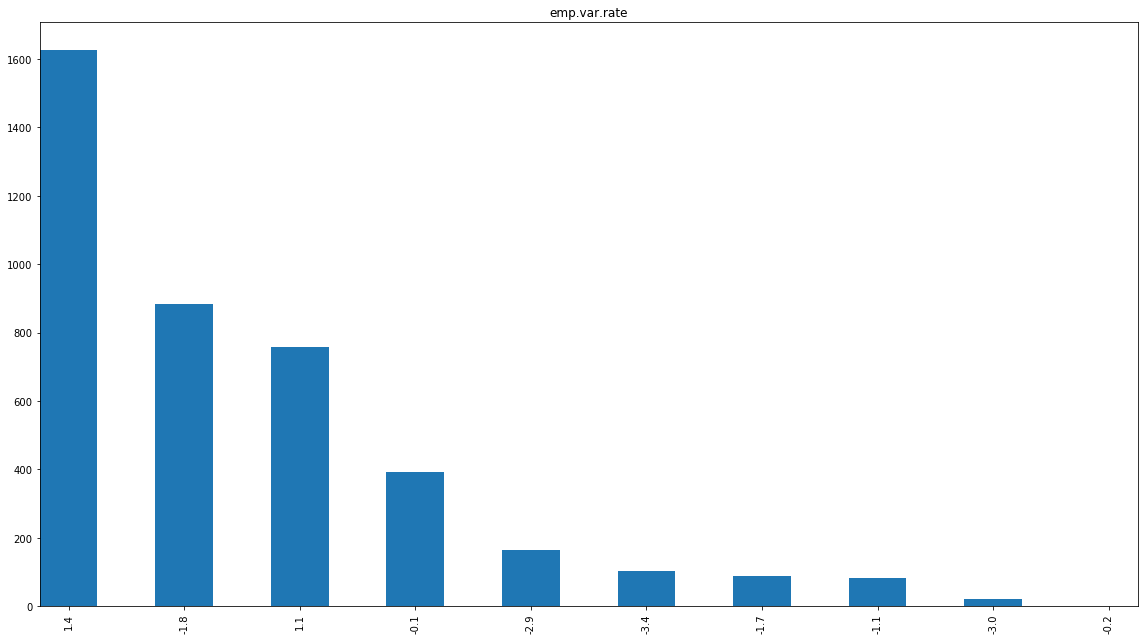

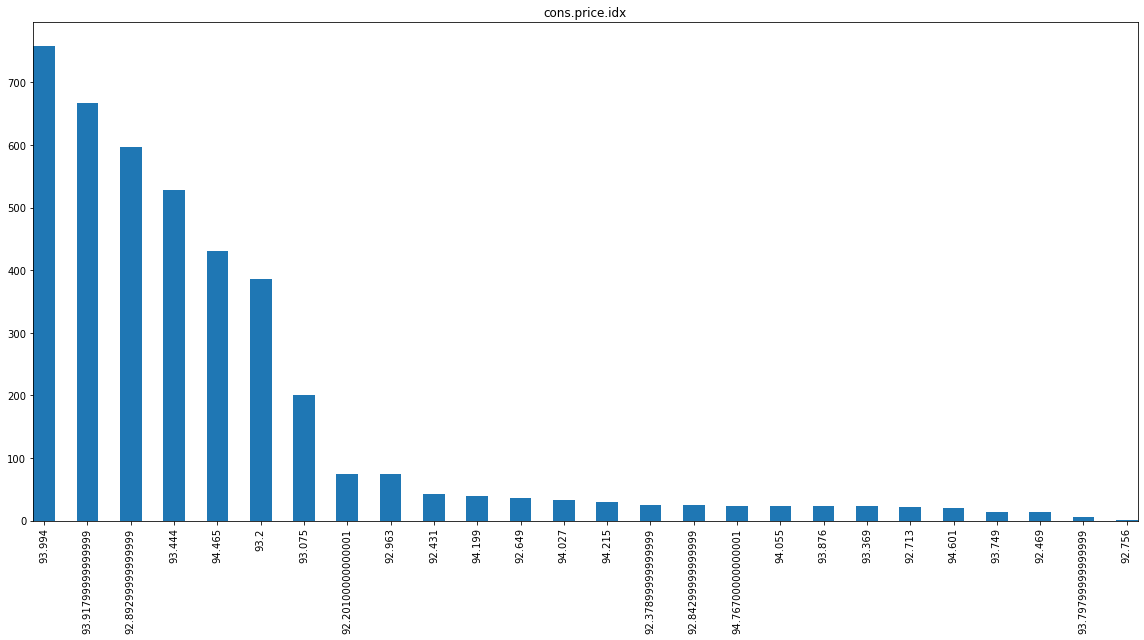

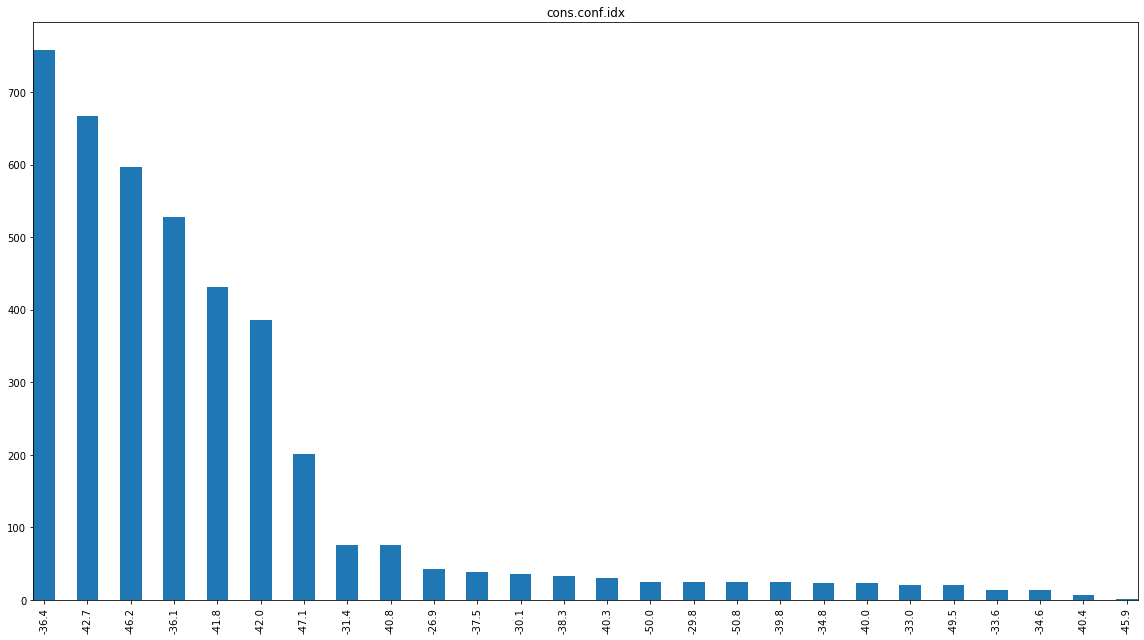

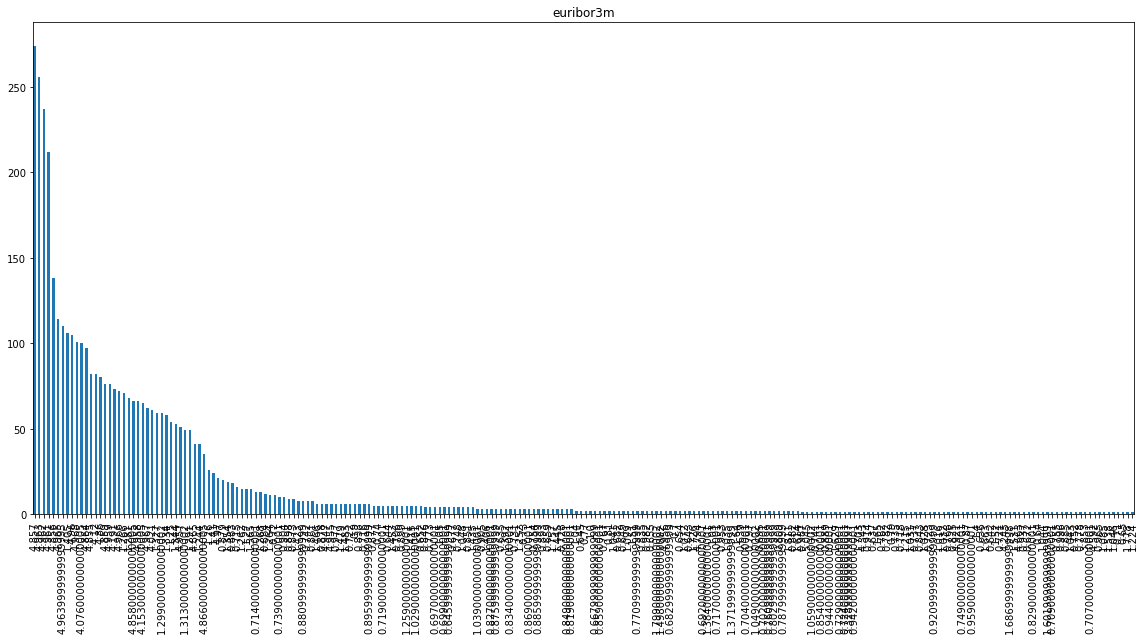

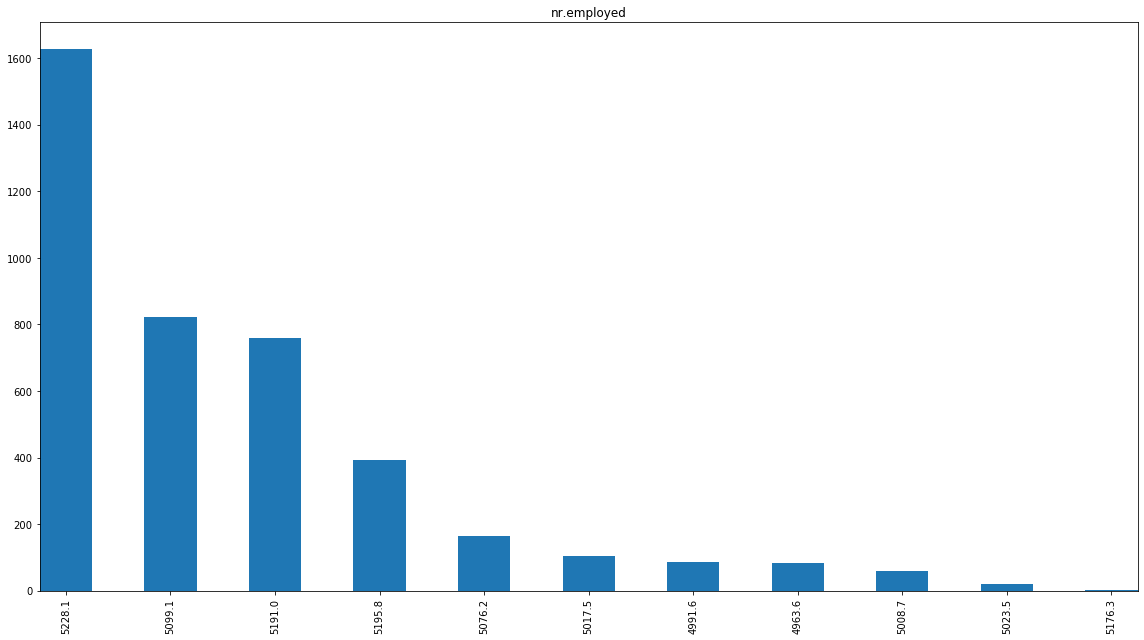

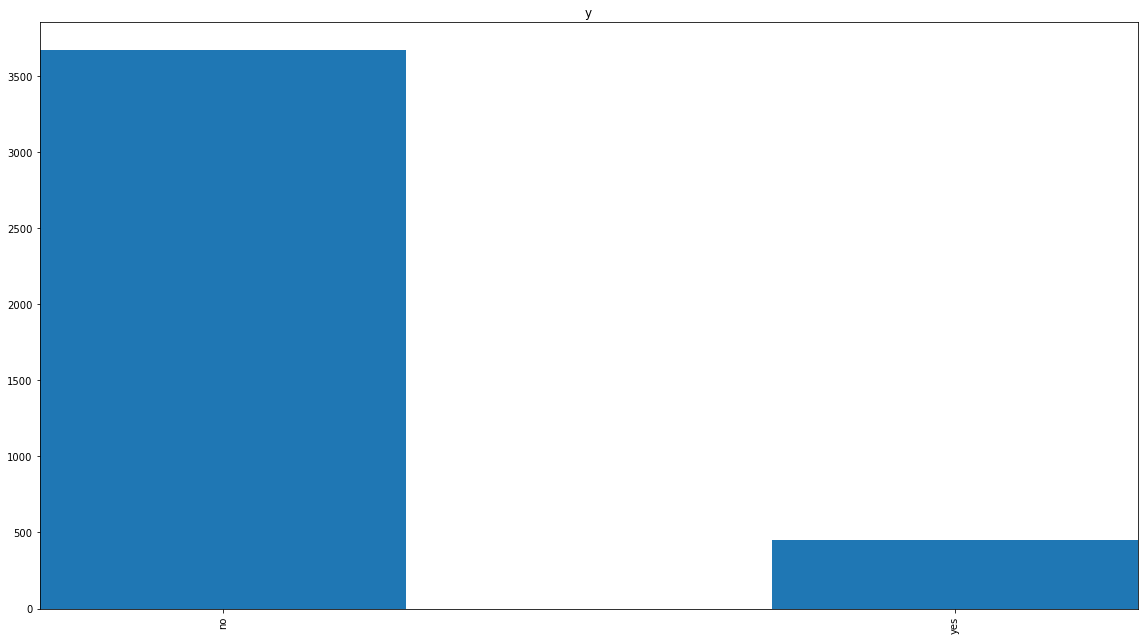

In [34]:

for (columnName, columnData) in dataset.iteritems():
    dataset[columnName].value_counts().plot(kind = 'bar' , title =  columnName)  
   

    

    plt.rcParams["figure.figsize"] = [16,9]
    plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight')
    plt.tight_layout()
    plt.show()
    
   #Visualizing the colums items frequency  
   

<h1><font color = 'Orange'>Stastical Data Describtion <h1>

In [35]:
dataset.describe() #Getting a brief stastical describtion of the data set (mean , standard deviation ..... etc)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"4,119.000","4,119.000","4,119.000","4,119.000","4,119.000","4,119.000","4,119.000","4,119.000","4,119.000","4,119.000"
mean,40.114,256.788,2.537,960.422,0.190,0.085,93.580,-40.499,3.621,"5,166.482"
std,10.313,254.704,2.568,191.923,0.542,1.563,0.579,4.595,1.734,73.668
min,18.000,0.000,1.000,0.000,0.000,-3.400,92.201,-50.800,0.635,"4,963.600"
25%,32.000,103.000,1.000,999.000,0.000,-1.800,93.075,-42.700,1.334,"5,099.100"
50%,38.000,181.000,2.000,999.000,0.000,1.100,93.749,-41.800,4.857,"5,191.000"
75%,47.000,317.000,3.000,999.000,0.000,1.400,93.994,-36.400,4.961,"5,228.100"
max,88.000,"3,643.000",35.000,999.000,6.000,1.400,94.767,-26.900,5.045,"5,228.100"



<h2>
    Pairwise Scatter plot <h2> 
     <font color ='Orange'> Since we have high nummber of features  we cannot plot them all in once so we will us Pairplot to plot them 

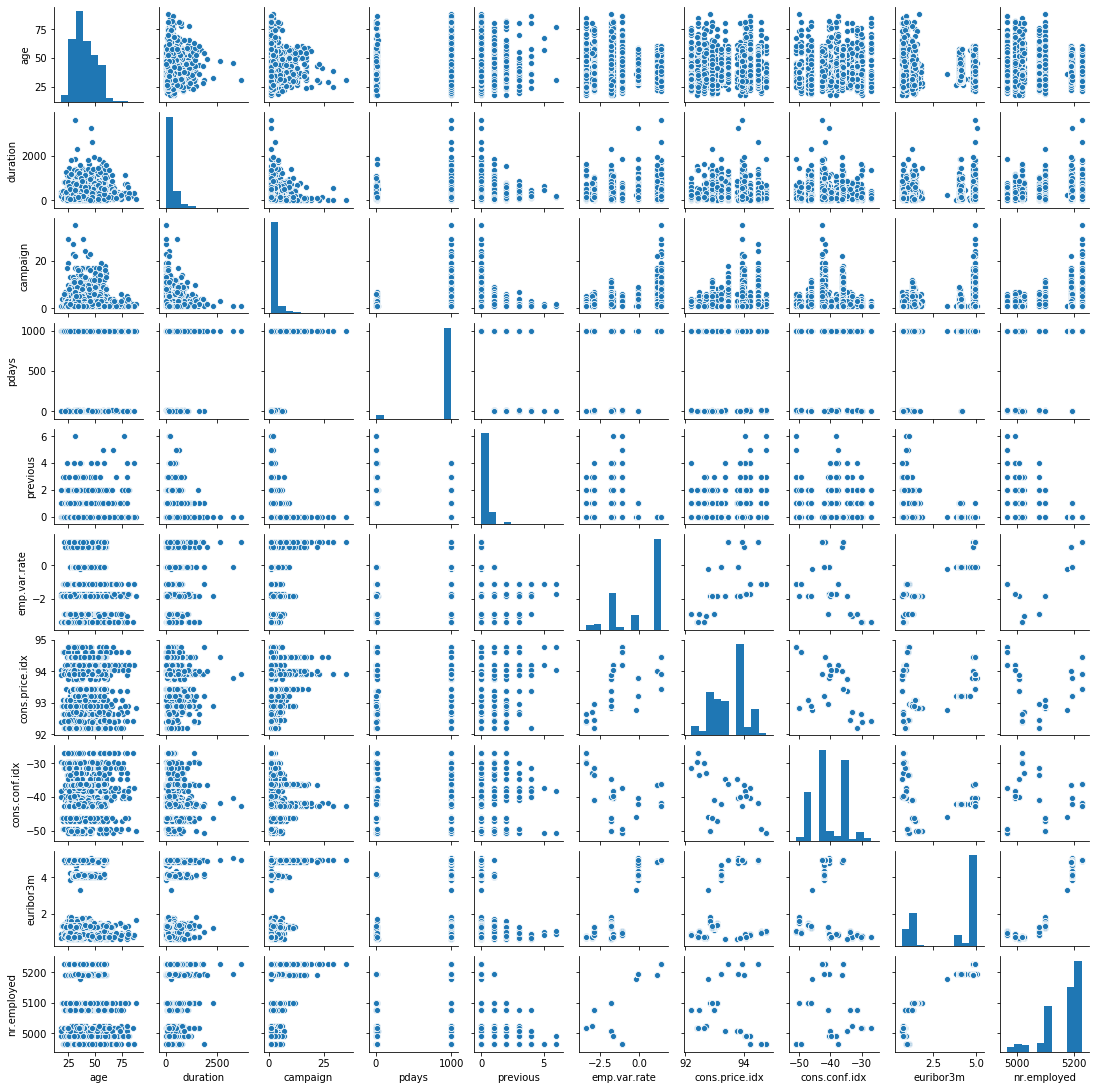

In [36]:
sns.pairplot(dataset , height = 1.5) # Draw scatterplots for joint relationships and histograms for univariate distributions
plt.show()                             # The diagonals are PDFs for each single feature

<h2> Data Correlation </h2>

In [37]:
pd.options.display.float_format= '{:,.3f}'.format
Corr = dataset.corr()
Corr  # data correlation help tp see how the data / how much the data 
        #are related to each other , and to have a general idea of thier relations 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000,0.041,-0.014,-0.043,0.051,-0.019,-0.000,0.098,-0.015,-0.042
duration,0.041,1.000,-0.085,-0.047,0.026,-0.029,0.017,-0.035,-0.032,-0.044
campaign,-0.014,-0.085,1.000,0.059,-0.091,0.176,0.145,0.008,0.159,0.161
pdays,-0.043,-0.047,0.059,1.000,-0.588,0.271,0.058,-0.092,0.301,0.382
previous,0.051,0.026,-0.091,-0.588,1.000,-0.415,-0.165,-0.051,-0.459,-0.515
emp.var.rate,-0.019,-0.029,0.176,0.271,-0.415,1.000,0.755,0.195,0.970,0.897
cons.price.idx,-0.000,0.017,0.145,0.058,-0.165,0.755,1.000,0.046,0.657,0.473
cons.conf.idx,0.098,-0.035,0.008,-0.092,-0.051,0.195,0.046,1.000,0.277,0.107
euribor3m,-0.015,-0.032,0.159,0.301,-0.459,0.970,0.657,0.277,1.000,0.943
nr.employed,-0.042,-0.044,0.161,0.382,-0.515,0.897,0.473,0.107,0.943,1.000


<h2><font color = 'Violet'> Visualizing Correlation </h2>

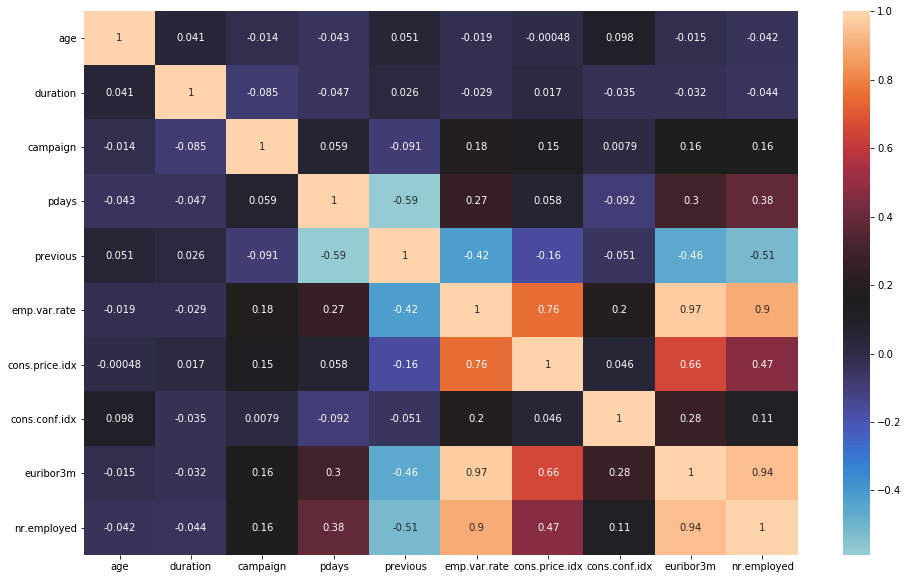

In [38]:
plt.figure(figsize=(16,10)) # Resize the plotting 

sns.heatmap(dataset.corr(), annot=True ,  center=0.16 ) #Use Heatmap to visualize the correlation 
plt.show()

<h1 > Prepartion of Data </h1>



In [39]:
X = dataset.drop('y', axis=1)
y = dataset['y']



In [40]:
tonumerical = ['job', 'marital' ,'education' ,'default' ,'housing' ,'loan' ,'contact' ,'month' ,'day_of_week' ,'poutcome']
X[tonumerical] #Get Categorical columns 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent
4116,student,single,high.school,no,no,no,cellular,may,mon,failure
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent


In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Transform Categorical columns to numerical 

X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['contact'] = le.fit_transform(X['contact'])
X['month'] = le.fit_transform(X['month'])
X['day_of_week'] = le.fit_transform(X['day_of_week'])
X['poutcome'] = le.fit_transform(X['poutcome'])


In [42]:
X[tonumerical] #Show Columns after Transformation 


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,2,0,2,0,0,6,0,1
1,7,2,3,0,0,0,1,6,0,1
2,7,1,3,0,2,0,1,4,4,1
3,7,1,2,0,1,1,1,4,0,1
4,0,1,6,0,2,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0,2,2,0,3,2,1
4115,0,1,3,0,2,0,1,3,0,1
4116,8,2,3,0,0,0,0,6,1,0
4117,0,1,3,0,0,0,0,1,0,1


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #Prepare the Data by getting 80 % as training data
                                                                            #and 20 % as testing data

<h1><font color = 'Orange'>Using  Linear Classifiers to classify the Data  </h1>

<h2>1-Decision Tree</h2>

<h3> <font color = 'Green '>Training and prediction </h3>

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(criterion= 'entropy')

tree_grid = GridSearchCV(tree_classifier, {'max_depth': [ 8,12,16,20], 'min_samples_split': [ 2, 3,4] 
                                           , 'min_samples_leaf' : [ 2, 3,4]
   },
 cv=3, scoring='accuracy' , verbose=1)    # GridsearchCv is used to run the classifier multiple times with multiple 
                                        #parameters given to it in this case max_depth and min_samples_split and 
                                        #min_samples_leaf are passed as parameters with various values  GridsearchCv will 
                                        #run all the possible fits to give at the end the best parameters
           





In [45]:
tree_grid.fit(X_train, y_train) # Train the tree model 



Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_leaf': [2, 3, 4],
                      

In [46]:
tree_grid.cv_results_         # get the results from the gridSearchCv

{'mean_fit_time': array([0.13033223, 0.10399699, 0.05299894, 0.04833206, 0.06999993,
        0.0613327 , 0.04699993, 0.05966719, 0.05099924, 0.05399879,
        0.0626657 , 0.05966504, 0.07233175, 0.06166633, 0.04666511,
        0.04866362, 0.04499809, 0.06666565, 0.04633307, 0.04500008,
        0.046333  , 0.04833372, 0.06899921, 0.05733339, 0.04499984,
        0.06399973, 0.04966752, 0.06399918, 0.05833379, 0.04099949,
        0.05199941, 0.05100028, 0.05866559, 0.04599873, 0.05499935,
        0.05899715]),
 'std_fit_time': array([0.01925874, 0.03505152, 0.00778902, 0.01211915, 0.02353912,
        0.01429048, 0.00432261, 0.00235815, 0.01849258, 0.01630868,
        0.02205094, 0.01759404, 0.01371952, 0.01641986, 0.00849618,
        0.01247059, 0.01771819, 0.0238923 , 0.0135985 , 0.01416652,
        0.01545696, 0.0122306 , 0.02083284, 0.01759459, 0.0127553 ,
        0.01745553, 0.00731889, 0.02272991, 0.01369569, 0.00496789,
        0.00648207, 0.01373668, 0.01575528, 0.01771901, 0.017

In [47]:
tree_grid.best_score_    # get the best score we can get from the various parameters 

0.898937784522003

In [48]:
   #get the  parameters  that result in best score 
bestTree = tree_grid.best_estimator_.get_params() 
bestTreeFrame = pd.DataFrame(bestTree.items() , columns= ['Parameter' , 'Parameter value '] )

bestTreeFrame 

,Parameter,Parameter value
0,class_weight,None
1,criterion,entropy
2,max_depth,8
3,max_features,None
4,max_leaf_nodes,None
5,min_impurity_decrease,0.000
6,min_impurity_split,None
7,min_samples_leaf,2
8,min_samples_split,3
9,min_weight_fraction_leaf,0.000


In [49]:
y_test_pred_tree = tree_grid.predict(X_test) # use the tree classifier to make predictions 

<h3><font color = 'Orange '>Review on classifier Performance / accuracy </h3>

In [50]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred_tree)  #use confusion matrix 


array([[702,  32],
       [ 40,  50]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,y_test_pred_tree)) # report  precision    recall  f1-score   support   accuracy  
accuracytree = metrics.accuracy_score(y_test, y_test_pred_tree) # another accuracy meter to use it later 
print("Accuracy:",accuracytree)                                    #to compare accuray of defferent models

              precision    recall  f1-score   support

          no       0.95      0.96      0.95       734
         yes       0.61      0.56      0.58        90

    accuracy                           0.91       824
   macro avg       0.78      0.76      0.77       824
weighted avg       0.91      0.91      0.91       824

Accuracy: 0.912621359223301


<h1><font color = 'Violet'> Visualization on different parameters values  effect  </h1>

In [57]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

<h3><font color = 'Orange '> A- max_Depth </h3>

best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}
best score:      0.89894 (+/-0.00269)
{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.104,0.035,0.011,0.005,8,2,3,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.900,0.902,0.895,0.899,0.003,1
2,0.053,0.008,0.014,0.005,8,2,4,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.899,0.902,0.891,0.897,0.005,2
4,0.070,0.024,0.012,0.007,8,3,3,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.895,0.904,0.892,0.897,0.005,2
0,0.130,0.019,0.042,0.026,8,2,2,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.896,0.900,0.894,0.897,0.002,4
10,0.063,0.022,0.011,0.006,12,2,3,"{'max_depth': 12, 'min_samples_leaf': 2, 'min_...",0.893,0.906,0.892,0.897,0.007,4
3,0.048,0.012,0.011,0.005,8,3,2,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.896,0.903,0.891,0.897,0.005,6
20,0.046,0.015,0.008,0.003,16,2,4,"{'max_depth': 16, 'min_samples_leaf': 2, 'min_...",0.892,0.903,0.895,0.897,0.005,6
15,0.049,0.012,0.009,0.004,12,4,2,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_...",0.903,0.891,0.895,0.896,0.005,8
16,0.045,0.018,0.007,0.000,12,4,3,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_...",0.902,0.889,0.896,0.896,0.005,9
5,0.061,0.014,0.017,0.000,8,3,4,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.894,0.903,0.888,0.895,0.006,10


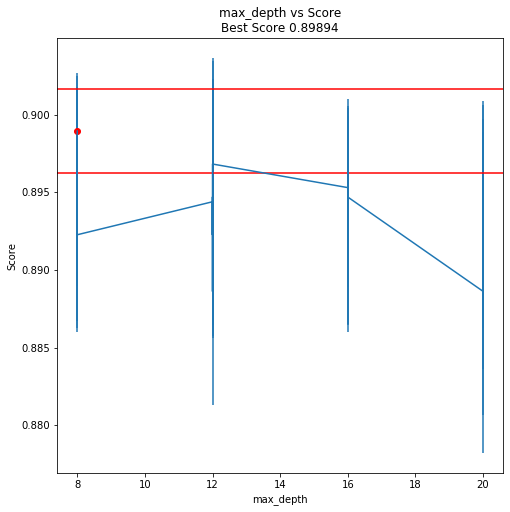

In [58]:
GridSearch_table_plot(tree_grid, 'max_depth', negative=False) # different max_depth values  effect


<h3><font color = 'Orange '> B- min_samples_split </h3>

best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}
best score:      0.89894 (+/-0.00269)
{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.104,0.035,0.011,0.005,8,2,3,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.900,0.902,0.895,0.899,0.003,1
2,0.053,0.008,0.014,0.005,8,2,4,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.899,0.902,0.891,0.897,0.005,2
4,0.070,0.024,0.012,0.007,8,3,3,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.895,0.904,0.892,0.897,0.005,2
0,0.130,0.019,0.042,0.026,8,2,2,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.896,0.900,0.894,0.897,0.002,4
10,0.063,0.022,0.011,0.006,12,2,3,"{'max_depth': 12, 'min_samples_leaf': 2, 'min_...",0.893,0.906,0.892,0.897,0.007,4
3,0.048,0.012,0.011,0.005,8,3,2,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.896,0.903,0.891,0.897,0.005,6
20,0.046,0.015,0.008,0.003,16,2,4,"{'max_depth': 16, 'min_samples_leaf': 2, 'min_...",0.892,0.903,0.895,0.897,0.005,6
15,0.049,0.012,0.009,0.004,12,4,2,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_...",0.903,0.891,0.895,0.896,0.005,8
16,0.045,0.018,0.007,0.000,12,4,3,"{'max_depth': 12, 'min_samples_leaf': 4, 'min_...",0.902,0.889,0.896,0.896,0.005,9
5,0.061,0.014,0.017,0.000,8,3,4,"{'max_depth': 8, 'min_samples_leaf': 3, 'min_s...",0.894,0.903,0.888,0.895,0.006,10


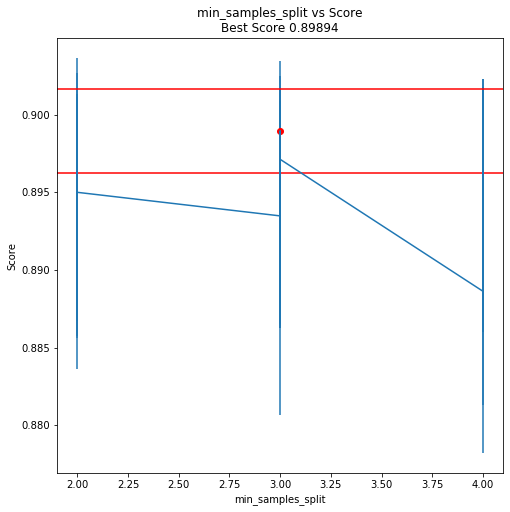

In [59]:
GridSearch_table_plot(tree_grid, 'min_samples_split', negative=False)


<h1><font color = 'Violet'> Decision Tree Visualization </h1>

In [60]:

Xarray =['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

Xarray # use a list of labels names (columns names) to pass it to be visulaized through graphviz 

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

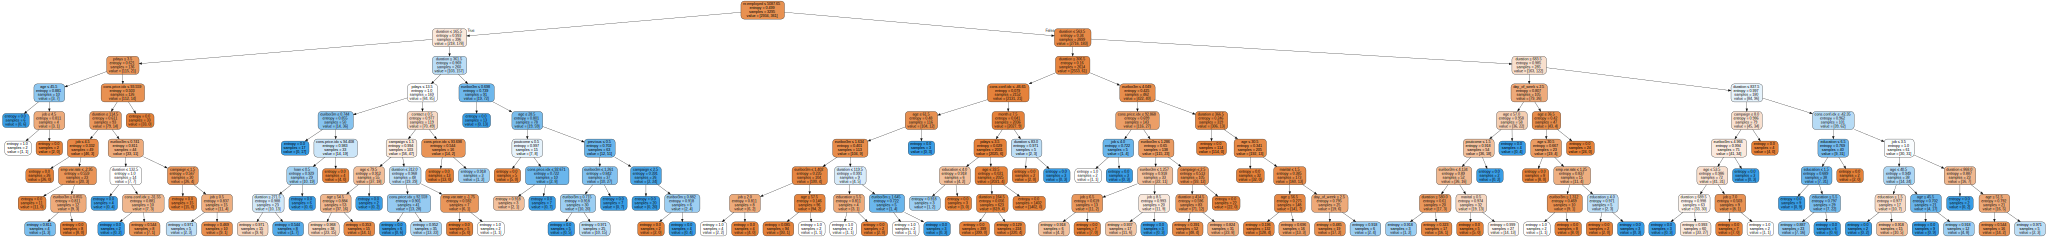

In [61]:
# use graphviz to visualize the decision tree and use pdot to resize the tree image to bs easily visable 
%matplotlib inline


import pydot


from graphviz import Source
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(tree_grid.best_estimator_, out_file=None,
                                feature_names=Xarray,
                                rounded=True,
                                filled=True, special_characters=True )

pdot = pydot.graph_from_dot_data(dot_data)
# Access element [0] because graph_from_dot_data actually returns a list of DOT elements.
pdot[0].set_graph_defaults(size = "\"55,55\"")
graph = Source(pdot[0].to_string())
graph

<h1><font color = 'Orange'> 2-Support  Vector Machines</h1>

In [62]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

#Create a svm Classifier
pipeline = Pipeline([('clf', svm.SVC(kernel='linear', C=1))]) 
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20)}
svm_grid_linear = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 


# pipline and FridSeachCv is used to test various parameters on the classifier and choose 
#the best parameter of the classifier





In [63]:

svm_grid_linear.fit(X_train, y_train) # Train the support vector machine classifier


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 10.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [64]:
svm_grid_linear.cv_results_  #show the complete results of all parmeters tested

{'mean_fit_time': array([37.82146414, 59.16149314, 60.12248063, 45.3226908 , 63.37543623,
        61.46012926, 71.32699005]),
 'std_fit_time': array([ 2.09970392, 18.38090974, 13.89942082, 13.38206918, 14.32106794,
         5.47843947, 21.51374072]),
 'mean_score_time': array([0.09266583, 0.06899961, 0.06966654, 0.06833267, 0.098665  ,
        0.08533247, 0.06833132]),
 'std_score_time': array([0.01347455, 0.00141568, 0.00169982, 0.00543773, 0.03487197,
        0.01732683, 0.0004698 ]),
 'param_clf__C': masked_array(data=[0.1, 0.5, 1, 2, 5, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__C': 0.1},
  {'clf__C': 0.5},
  {'clf__C': 1},
  {'clf__C': 2},
  {'clf__C': 5},
  {'clf__C': 10},
  {'clf__C': 20}],
 'split0_test_score': array([0.9044586 , 0.89899909, 0.9044586 , 0.89171975, 0.88898999,
        0.9044586 , 0.90900819]),
 'split1_test_score': array([0.91712204, 0.91803279, 0.92167577

In [65]:
svm_grid_linear.best_score_   # the best score we can get from the svm by testing all parameters 

0.9128983308042489

In [66]:
best = svm_grid_linear.best_estimator_.get_params()   # save the best parameters in best

In [67]:

bestSvmFrame = pd.DataFrame(best.items() , columns= ['Parameter' , 'Parameter value '] )

bestSvmFrame    # print the best parameters 

,Parameter,Parameter value
0,memory,None
1,steps,"[(clf, SVC(C=20, cache_size=200, class_weight=..."
2,verbose,False
3,clf,"SVC(C=20, cache_size=200, class_weight=None, c..."
4,clf__C,20
5,clf__cache_size,200
6,clf__class_weight,None
7,clf__coef0,0.000
8,clf__decision_function_shape,ovr
9,clf__degree,3


In [68]:
y_test_pred_svm = svm_grid_linear.predict(X_test)  ##Use the model to predict X_test 

<h3><font color = 'Orange '>Review on classifier Performance / accuracy </h3>

In [69]:
confusion_matrix(y_test, y_test_pred_svm) # confusion matrix 

array([[721,  13],
       [ 57,  33]], dtype=int64)

In [70]:
print(classification_report(y_test,y_test_pred_svm)) # report  precision    recall  f1-score   support   accuracy  
accuracysvm = metrics.accuracy_score(y_test, y_test_pred_svm)
print("Accuracy:",accuracysvm)
                                    # another accuracy meter to use it later 
                                             #to compare accuray of defferent models

              precision    recall  f1-score   support

          no       0.93      0.98      0.95       734
         yes       0.72      0.37      0.49        90

    accuracy                           0.92       824
   macro avg       0.82      0.67      0.72       824
weighted avg       0.90      0.92      0.90       824

Accuracy: 0.9150485436893204


<h1><font color = 'Violet'> Visualize the various parameters effect</h1>

best parameters: {'clf__C': 20}
best score:      0.91290 (+/-0.00379)
{'clf': SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False),
 'clf__C': 20,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'auto_deprecated',
 'clf__kernel': 'linear',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False,
 'memory': None,
 'steps': [('clf',
            SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))],
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,71.327,21.514,0.068,0.000,20,{'clf__C': 20},0.909,0.918,0.912,0.913,0.004,1
2,60.122,13.899,0.070,0.002,1,{'clf__C': 1},0.904,0.922,0.909,0.912,0.007,2
1,59.161,18.381,0.069,0.001,0.500,{'clf__C': 0.5},0.899,0.918,0.913,0.910,0.008,3
0,37.821,2.100,0.093,0.013,0.100,{'clf__C': 0.1},0.904,0.917,0.908,0.910,0.005,4
5,61.460,5.478,0.085,0.017,10,{'clf__C': 10},0.904,0.916,0.906,0.909,0.005,5
4,63.375,14.321,0.099,0.035,5,{'clf__C': 5},0.889,0.923,0.911,0.907,0.014,6
3,45.323,13.382,0.068,0.005,2,{'clf__C': 2},0.892,0.921,0.897,0.903,0.013,7


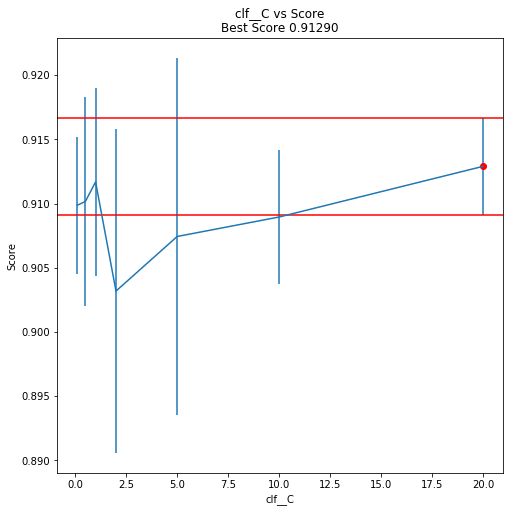

In [71]:
GridSearch_table_plot(svm_grid_linear, 'clf__C', negative=False)


<h1><font color = 'Orange'> 3- Preceptron linear classifier</h1>

In [72]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=0)
gridsearch = GridSearchCV(perceptron, {'alpha': [0.1, 0.3, 0.2],'eta0': [1.5,0.2 , 0.3, 0.1, 1.0,0.5] , 'max_iter': [200, 500, 1000, 1500, 2000]
   },
 cv=3, scoring='accuracy' , verbose=1)
    # GridsearchCv is used to run the classifier multiple times with multiple 
                                        #parameters given to it in this case alpha and eta0 and 
                                        #max_iter are passed as parameters with various values  GridsearchCv will 
                                        #run all the possible fits to give at the end the best parameters
           

In [73]:
gridsearch.fit(X_train, y_train) # Train the preceptron classifier  model 


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   11.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.2],
                         'eta0': [1.5, 0.2, 0.3, 0.1, 1.0, 0.5],
                         'max_iter': [200, 500, 1000, 1500, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [74]:
gridsearch.cv_results_    #show the complete results of all parmeters tested

{'mean_fit_time': array([0.08566546, 0.03599803, 0.03099926, 0.02799845, 0.02433236,
        0.03199927, 0.04233384, 0.03499691, 0.02199912, 0.02833311,
        0.03200046, 0.02266685, 0.0263323 , 0.01966484, 0.01500098,
        0.03066619, 0.0226655 , 0.02899909, 0.02833358, 0.03333402,
        0.02866602, 0.02466663, 0.0326666 , 0.02266622, 0.01933281,
        0.02699868, 0.02133322, 0.02266622, 0.02099991, 0.02566465,
        0.0266664 , 0.02299841, 0.02466647, 0.02566592, 0.02166732,
        0.02266645, 0.0233326 , 0.02533221, 0.01433214, 0.024333  ,
        0.02699884, 0.02299841, 0.0156668 , 0.01700028, 0.02533166,
        0.02699947, 0.03333243, 0.02799884, 0.01766634, 0.02066644,
        0.02133211, 0.03266637, 0.01999982, 0.03099831, 0.02933129,
        0.01966604, 0.01966596, 0.02399953, 0.0243334 , 0.02400025,
        0.01933352, 0.02799789, 0.02866562, 0.01899918, 0.01999903,
        0.02666521, 0.02299984, 0.01600019, 0.02399874, 0.01633263,
        0.02433252, 0.02166764,

<h1><font color = 'Violet'> Visualize the various parameters effect</h1>

best parameters: {'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}
best score:      0.88012 (+/-0.03120)
{'alpha': 0.1,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.5,
 'fit_intercept': True,
 'max_iter': 200,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086,0.042,0.026,0.003,0.100,1.500,200,"{'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
64,0.020,0.005,0.011,0.005,0.200,1.500,2000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
63,0.019,0.008,0.012,0.004,0.200,1.500,1500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
62,0.029,0.008,0.020,0.003,0.200,1.500,1000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
61,0.028,0.009,0.017,0.007,0.200,1.500,500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 500}",0.900,0.836,0.904,0.880,0.031,1
60,0.019,0.003,0.011,0.005,0.200,1.500,200,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
59,0.024,0.008,0.017,0.002,0.300,0.500,2000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
58,0.024,0.009,0.014,0.004,0.300,0.500,1500,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
57,0.024,0.008,0.011,0.005,0.300,0.500,1000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
65,0.027,0.010,0.014,0.004,0.200,0.200,200,"{'alpha': 0.2, 'eta0': 0.2, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1


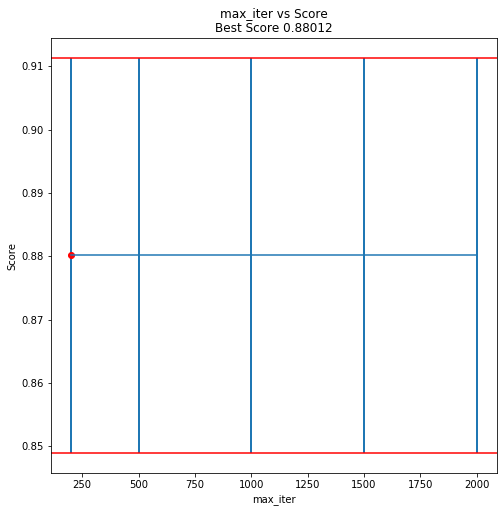

In [75]:


GridSearch_table_plot(gridsearch, 'max_iter', negative=False) #Visualize max_iter various values effect and score



best parameters: {'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}
best score:      0.88012 (+/-0.03120)
{'alpha': 0.1,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.5,
 'fit_intercept': True,
 'max_iter': 200,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086,0.042,0.026,0.003,0.100,1.500,200,"{'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
64,0.020,0.005,0.011,0.005,0.200,1.500,2000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
63,0.019,0.008,0.012,0.004,0.200,1.500,1500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
62,0.029,0.008,0.020,0.003,0.200,1.500,1000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
61,0.028,0.009,0.017,0.007,0.200,1.500,500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 500}",0.900,0.836,0.904,0.880,0.031,1
60,0.019,0.003,0.011,0.005,0.200,1.500,200,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
59,0.024,0.008,0.017,0.002,0.300,0.500,2000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
58,0.024,0.009,0.014,0.004,0.300,0.500,1500,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
57,0.024,0.008,0.011,0.005,0.300,0.500,1000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
65,0.027,0.010,0.014,0.004,0.200,0.200,200,"{'alpha': 0.2, 'eta0': 0.2, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1


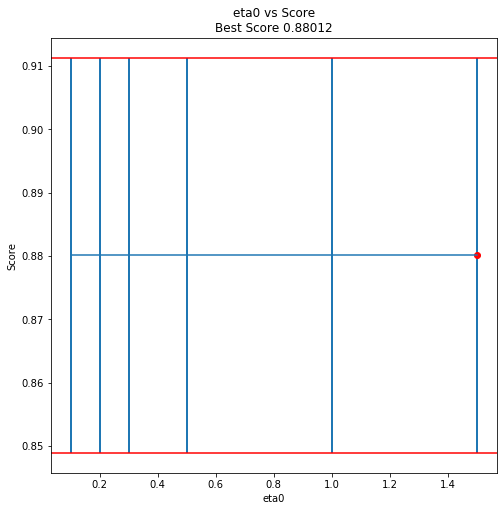

In [76]:

GridSearch_table_plot(gridsearch, 'eta0', negative=False)      #Visualize eta0 various values effect and score

best parameters: {'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}
best score:      0.88012 (+/-0.03120)
{'alpha': 0.1,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.5,
 'fit_intercept': True,
 'max_iter': 200,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086,0.042,0.026,0.003,0.100,1.500,200,"{'alpha': 0.1, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
64,0.020,0.005,0.011,0.005,0.200,1.500,2000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
63,0.019,0.008,0.012,0.004,0.200,1.500,1500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
62,0.029,0.008,0.020,0.003,0.200,1.500,1000,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
61,0.028,0.009,0.017,0.007,0.200,1.500,500,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 500}",0.900,0.836,0.904,0.880,0.031,1
60,0.019,0.003,0.011,0.005,0.200,1.500,200,"{'alpha': 0.2, 'eta0': 1.5, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1
59,0.024,0.008,0.017,0.002,0.300,0.500,2000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 2000}",0.900,0.836,0.904,0.880,0.031,1
58,0.024,0.009,0.014,0.004,0.300,0.500,1500,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1500}",0.900,0.836,0.904,0.880,0.031,1
57,0.024,0.008,0.011,0.005,0.300,0.500,1000,"{'alpha': 0.3, 'eta0': 0.5, 'max_iter': 1000}",0.900,0.836,0.904,0.880,0.031,1
65,0.027,0.010,0.014,0.004,0.200,0.200,200,"{'alpha': 0.2, 'eta0': 0.2, 'max_iter': 200}",0.900,0.836,0.904,0.880,0.031,1


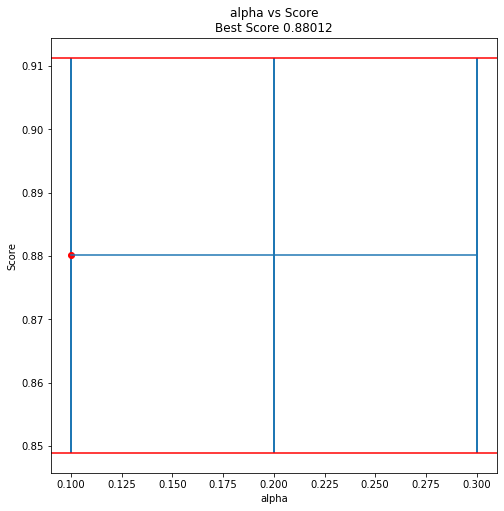

In [77]:

GridSearch_table_plot(gridsearch, 'alpha', negative=False)   #Visualize alpha various values effect and score


In [78]:
gridsearch.best_score_ # the best score we can get from the svm by testing all parameters 


0.8801213960546282

In [79]:
bestPrecep =gridsearch.best_estimator_.get_params()    # save the best parameters in bestPrecep


In [80]:
bestPrecepFrame = pd.DataFrame(bestPrecep.items() , columns= ['Parameter' , 'Parameter value '] )

bestPrecepFrame  # print the best parameters 


,Parameter,Parameter value
0,alpha,0.100
1,class_weight,None
2,early_stopping,False
3,eta0,1.500
4,fit_intercept,True
5,max_iter,200
6,n_iter_no_change,5
7,n_jobs,None
8,penalty,None
9,random_state,0


In [81]:
y_test_pred_preceptron = gridsearch.predict(X_test)       ##Use the model to predict X_test 

<h3><font color = 'Orange '>Review on classifier Performance / accuracy </h3>

In [82]:
confusion_matrix(y_test, y_test_pred_preceptron) # Report confusion matrix 

array([[731,   3],
       [ 82,   8]], dtype=int64)

In [83]:

print(classification_report(y_test,y_test_pred_preceptron))  # report  precision    recall  f1-score   support   accuracy  
accuracyPreceptron = metrics.accuracy_score(y_test, y_test_pred_preceptron)
print("Accuracy:",accuracyPreceptron)  # another accuracy meter to use it later 
                                             #to compare accuray of defferent models

              precision    recall  f1-score   support

          no       0.90      1.00      0.95       734
         yes       0.73      0.09      0.16        90

    accuracy                           0.90       824
   macro avg       0.81      0.54      0.55       824
weighted avg       0.88      0.90      0.86       824

Accuracy: 0.8968446601941747


<h1><font color = 'Orange'> 4- 'Gaussian' Naive bayes classifier  </h1>

In [84]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_clf = GaussianNB()
GaussianNB_clf.fit(X_train, y_train)  # Train the  classifier  model 


GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
y_test_pred_GaussianNB = GaussianNB_clf.predict(X_test) ##Use the model to predict X_test 


<h3><font color = 'Orange '>Review on classifier Performance / accuracy </h3>

In [86]:
confusion_matrix(y_test, y_test_pred_GaussianNB) # Report confusion matrix 

array([[641,  93],
       [ 33,  57]], dtype=int64)

In [87]:

print(classification_report(y_test,y_test_pred_GaussianNB))  # report  precision    recall  f1-score   support   accuracy  
accuracyGBN = metrics.accuracy_score(y_test, y_test_pred_GaussianNB) 
print("Accuracy:",accuracyGBN)                # another accuracy meter to use it later 
                                                       #to compare accuray of defferent models

              precision    recall  f1-score   support

          no       0.95      0.87      0.91       734
         yes       0.38      0.63      0.48        90

    accuracy                           0.85       824
   macro avg       0.67      0.75      0.69       824
weighted avg       0.89      0.85      0.86       824

Accuracy: 0.8470873786407767


<h1><font color = "orrange  "> Performance Comparison </h1>

<h2>  Comparison of accuracy </h2>

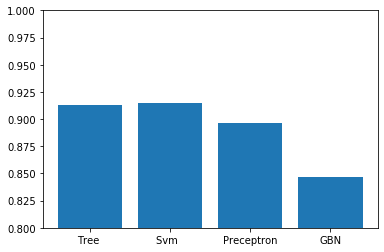

<Figure size 1440x720 with 0 Axes>

In [195]:
X = np.array(['Tree ','Svm  ','Preceptron' , 'GBN' ])
Y = np.array([accuracytree,accuracysvm,accuracyPreceptron , accuracyGBN])

plt.bar(X,Y)
plt.axis([None, None, 0.8, 1])
plt.figure(figsize=(20,10))

plt.show()

<h2> Overall Comparison of performance  </h2>

In [210]:
GNBREPORT = classification_report(y_test,y_test_pred_GaussianNB ,  output_dict=True )
PRCPREPORT = classification_report(y_test,y_test_pred_preceptron ,  output_dict=True )
SVMREPORT = classification_report(y_test,y_test_pred_svm ,  output_dict=True )
TREEREPORT = classification_report(y_test,y_test_pred_tree ,  output_dict=True )

df1 = pd.DataFrame.from_dict(GNBREPORT)
df1.drop(['support'] , inplace = True )
df2 = pd.DataFrame.from_dict(PRCPREPORT)
df2.drop(['support'] , inplace = True )
df3 = pd.DataFrame.from_dict(SVMREPORT)
df3.drop(['support'] , inplace = True )
df4 = pd.DataFrame.from_dict(TREEREPORT)
df4.drop(['support'] , inplace = True )

df1['keys'] =  'NAIVE'
df2['keys'] ='PRCEP'
df3['keys'] = 'SVM'
df4['keys'] = 'Tree'


DF = pd.concat([df1,df2,df3,df4],keys=['NAIVE','PRCEP','SVM','Tree'])

DF.drop(columns = ['keys'] , inplace = True )

DF.T

NAIVE                     PRCEP                       SVM  \
             precision recall f1-score precision recall f1-score precision   
no               0.951  0.873    0.911     0.899  0.996    0.945     0.927   
yes              0.380  0.633    0.475     0.727  0.089    0.158     0.717   
accuracy         0.847  0.847    0.847     0.897  0.897    0.897     0.915   
macro avg        0.666  0.753    0.693     0.813  0.542    0.552     0.822   
weighted avg     0.889  0.847    0.863     0.880  0.897    0.859     0.904   

                                  Tree                  
             recall f1-score precision recall f1-score  
no            0.982    0.954     0.946  0.956    0.951  
yes           0.367    0.485     0.610  0.556    0.581  
accuracy      0.915    0.915     0.913  0.913    0.913  
macro avg     0.674    0.719     0.778  0.756    0.766  
weighted avg  0.915    0.903     0.909  0.913    0.911

<h1>                                        THE END                                                          </h1>